In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer

In [3]:
train_df = pd.read_csv('./data/train.csv')
train_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


# Convert lease_commence_date to age and discretise to bins

<Axes: ylabel='Frequency'>

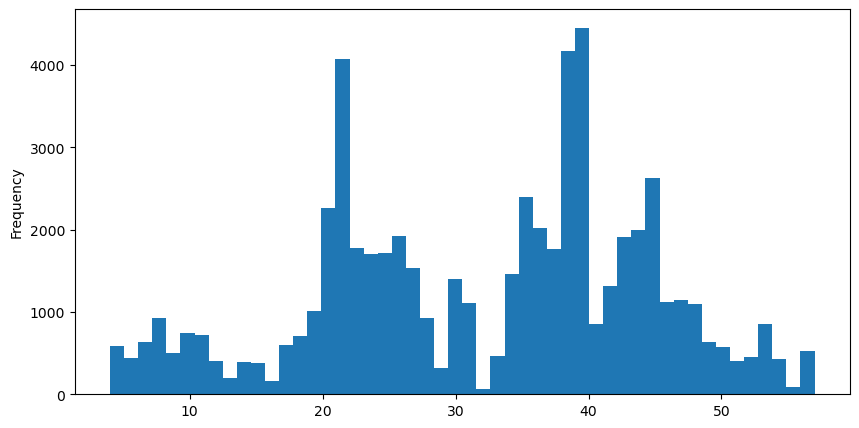

In [4]:
train_df['age'] = train_df['lease_commence_date'].apply(lambda x: 2023 - x)
train_df.drop(columns=['lease_commence_date'], inplace=True)
train_df['age'].plot(kind='hist', bins=50, figsize=(10, 5))

<Axes: ylabel='Frequency'>

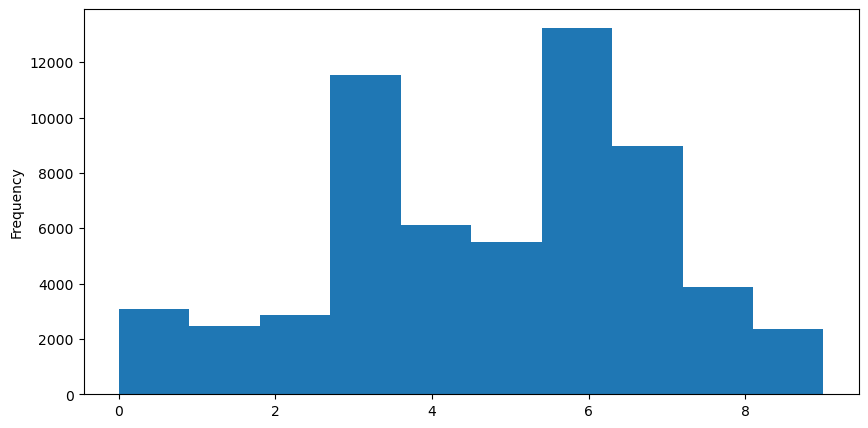

In [5]:
n_age_bins = 10
age_KBD = KBinsDiscretizer(n_bins=n_age_bins, encode='ordinal', strategy='uniform')
age_KBD.fit(train_df[['age']])
age_KBD.bin_edges_
train_df['age_bin'] = age_KBD.transform(train_df[['age']])
train_df['age_bin'].plot(kind='hist', bins=n_age_bins, figsize=(10, 5))

# Distance to good schools